In [1]:
import numpy as np
from math import e, ceil, log, sin, inf, pi
import random
import matplotlib.pyplot  as plt

In [2]:
f = lambda x1, x2: np.e**np.sin(x1**2)+x2

In [3]:
a_x1 = -2
b_x1 = 2

a_x2 = 0
b_x2 = 1

In [4]:
N = 50
N_t = 4
p_m = 0.1
p_c = 0.8
max_t = 100
max_t_nc = 20
h = 1e-4

In [5]:
find_power_of_2 = lambda a, b, h: ceil( log( (b-a)/h, 2 ) )

In [6]:
def rand_ind(p):
    ind = ""
    for i in range(p):
        temp = str(random.randint(0, 1))
        ind += temp 
    return(ind)

In [7]:
def M(x, a, b, n):
    x_r = x[::-1]
    k = (b-a)/(2**n-1)
    s = 0
    for i in range(n):
        s += 2**i * int(x_r[i])
    return a + k*s

In [8]:
def eval_P(P, a1, b1, a2, b2, m1, m2, N):
    best_ind = 0
    res = 0
    eval_P = inf
    for i in range(N):
        temp1 = M(P[i][:m1-1], a1, b1, m1-1)
        temp2 = M(P[i][m2+1:], a2, b2, m2-1)
        if -f(temp1, temp2) < eval_P:
            res = (temp1, temp2)
            best_ind = P[i]
            eval_P = -f(temp1, temp2)
    return eval_P, best_ind, res

In [9]:
def tournament(P, a1, b1, a2, b2, m1, m2, N, N_t):
    s = []
    r = []
    for i in range(N_t):
        r.append( random.randint(0, N-1) )  
        temp1 = M(P[r[i]][:m1-1], a1, b1, m1-1)
        temp2 = M(P[r[i]][m2+1:], a2, b2, m2-1)
        s.append( -f(temp1, temp2) )
    return r[s.index(min(s))]

In [10]:
def mutation(x, p_m, n):
    x = x[::-1]
    ind = ''
    if random.uniform(0, 1) < p_m:
        r = random.randint(0, n)
        for i in range(n):           
            if i == r:
                ind += str(abs(int(x[r])-1))
            else:
                ind += x[i] 
    else:
        ind = x
    return ind[::-1]

In [11]:
def cross(x1, x2, p_c, n):
    x1 = x1[::-1]
    x2 = x2[::-1]
    ind1 = ''
    ind2 = ''
    if random.uniform(0, 1) < p_c:
        r = random.randint(1, n)
        for i in range(n):           
            if i <= r:
                ind1 += x2[i]
                ind2 += x1[i]
            else:
                ind1 += x1[i]
                ind2 += x2[i]
    else:
        ind1 = x1
        ind2 = x2
    return ind1[::-1], ind2[::-1]

In [12]:
m1 = find_power_of_2(a_x1, b_x1, h)
m2 = find_power_of_2(a_x2, b_x2, h)

n = m1+m2

P_t = []
t = 0
P_t.append([])
for i in range(N):
    x_s1 = rand_ind(m1)
    x_s2 = rand_ind(m2)
    P_t[t].append(x_s1+x_s2)
res = eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)
t_m = 0
hist = []
hist.append(res[0])
for i in range(1, max_t):
    if t_m > max_t_nc:
        break;
    
    if eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)[0] < -res[0]:
        t_m = 0
        res_r = eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)
        res_ = list(res_r)
        res_[0] = -res_r[0]
        res = tuple(res_)
    else:
        t_m += 1

    t += 1
    P_t.append([])
    while len(P_t[t]) < N:
        ind_tour = []
        for j in range(2):
            ind_tour.append(tournament(P_t[t-1], a_x1, b_x1, a_x2, b_x2, m1, m2, N, N_t))
        ind_m = []
        for j in range(2):
            ind_m.append(mutation(P_t[t-1][ind_tour[j]], p_m, n))
            
        ind_c = cross(ind_m[0], ind_m[1], p_c, n)
        
        P_t[t].append(ind_c[0])
        P_t[t].append(ind_c[1])
    hist.append(eval_P(P_t[t], a_x1, b_x1, a_x2, b_x2, m1, m2, N)[0])

In [13]:
res

(3.718281476068757,
 '001011111100011001111111111111',
 (-1.2535172582171086, 1.0))

In [14]:
l = np.arange(t+1)

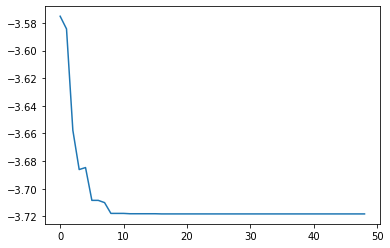

In [15]:
plt.plot(l, hist)

In [16]:
x_ = np.linspace(a_x1, b_x1, 200)
y_ = np.linspace(a_x2, b_x2, 200)

xx, yy = np.meshgrid(x_, y_)
zz = f(xx, yy)

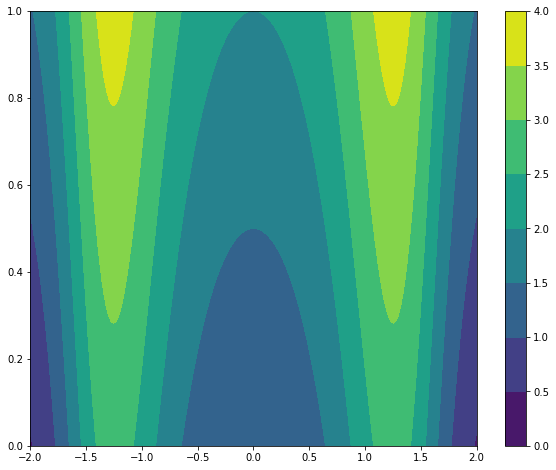

In [17]:
fig = plt.figure(figsize=(10,8))
plt.contourf(xx, yy, zz)
plt.colorbar()